In [15]:
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

### 1. load data

In [3]:
data = pd.read_excel('./caseNum/data_sum.xlsx', header=0)
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,新增确诊,新增疑似,新增死亡
0,2020-01-16,4,0,1
1,2020-01-17,17,0,0
2,2020-01-18,59,0,1
3,2020-01-19,77,0,1
4,2020-01-20,77,27,2


### 2. data mocking

In [4]:
random.seed(303)

In [5]:
data['mock'] = [random.randint(10000, 100000) for _ in range(0, data.shape[0])]
data.head()

,Date,新增确诊,新增疑似,新增死亡,mock
0,2020-01-16,4,0,1,14149
1,2020-01-17,17,0,0,41481
2,2020-01-18,59,0,1,35546
3,2020-01-19,77,0,1,22042
4,2020-01-20,77,27,2,84212


In [6]:
data.rename(columns={'新增确诊': 'Newly diagnosed', 
                     '新增疑似': 'Newly suspected', 
                     '新增死亡': 'Newly death'}, inplace=True)
data.head()

,Date,Newly diagnosed,Newly suspected,Newly death,mock
0,2020-01-16,4,0,1,14149
1,2020-01-17,17,0,0,41481
2,2020-01-18,59,0,1,35546
3,2020-01-19,77,0,1,22042
4,2020-01-20,77,27,2,84212


In [7]:
print('%s\n%s\n%s\n%s\n'%(data['Newly diagnosed'].min(), data['Newly diagnosed'].max(),
      data['mock'].min(), data['mock'].max()))

4
15153
10541
99916



### 3. ordinary line chart

- because of the huge numerical difference between the daily number of sick tweets and the daily number of cases, I suggest using a line chart with double axes.

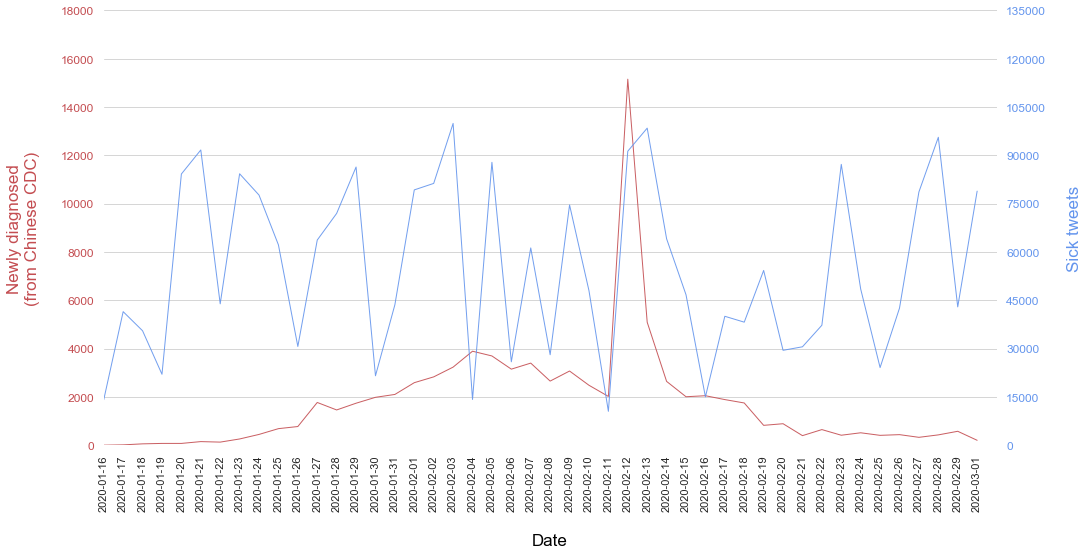

In [8]:
print('\n\n')
sb.set(style='white')
fig = plt.figure(figsize=[16, 8], frameon=False)
ax1 = fig.add_subplot(111)
# share the X axis
ax2 = ax1.twinx()

# set xticks
xticks = [str(d).split()[0] for d in data['Date']]

# line plot 1
sb.lineplot(x=xticks, y=data['Newly diagnosed'], linewidth=1, ax=ax1, alpha=0.9, color='r')
ax1.axes.set_ylabel('Newly diagnosed\n(from Chinese CDC)\n', fontsize=17, color='r')
ax1.axes.set_xlabel('\nDate', fontsize=17, color='black', position=(0.5, 0.5))
ax1.tick_params('y', labelcolor='r', labelsize='medium', width=1, color='None')
ax1.grid(axis='y', b=True, linestyle='-', alpha=0.8)
ax1.set_ylim([0, 18000])
ax1.set_xlim((0, len(xticks)))
ax1.set_xticks(range(0, len(xticks), 1))
ax1.set_xticklabels(xticks, rotation=90)
for item in ax1.spines.keys():
    ax1.spines[item].set_visible(False)

# line plot 2
sb.lineplot(x=xticks, y=data['mock'], linewidth=1, ax=ax2, alpha=0.9, color='cornflowerblue')
ax2.axes.set_ylabel('\nSick tweets', fontsize=17, rotation=90, color='cornflowerblue')
ax2.tick_params('y', labelcolor='cornflowerblue', labelsize='medium', width=1, color='None')
ax2.set_ylim([0, 135000])
# ax1's tick interval / ylim = ax2's tick interval / ylim
ax2.set_yticks(np.linspace(0, 135000, 10))
ax2.set_xlim((0, len(xticks)))
ax2.set_xticks(range(0, len(xticks), 1))
for item in ax2.spines.keys():
    ax2.spines[item].set_visible(False)

In [9]:
fig.savefig('./1.png', transparent=False, facecolor='white', dpi=800, quality=95)
plt.close(fig)

### 4. cumulative bar chart

In [10]:
for row in range(data.shape[0]):
    if row < data.shape[0] - 1:
        data.loc[row + 1, 'diagCu'] = sum(list(data['Newly diagnosed'])[:row + 2])
        data.loc[row + 1, 'mockCu'] = sum(list(data['mock'])[:row + 2])
data.head()

,Date,Newly diagnosed,Newly suspected,Newly death,mock,diagCu,mockCu
0,2020-01-16,4,0,1,14149,NaN,NaN
1,2020-01-17,17,0,0,41481,21.0,55630.0
2,2020-01-18,59,0,1,35546,80.0,91176.0
3,2020-01-19,77,0,1,22042,157.0,113218.0
4,2020-01-20,77,27,2,84212,234.0,197430.0


In [11]:
print('%s\n%s\n%s\n%s\n'%(data['diagCu'].min(), data['diagCu'].max(),
      data['mockCu'].min(), data['mockCu'].max()))

21.0
81475.0
55630.0
2530046.0



In [12]:
data.fillna(0, inplace=True)

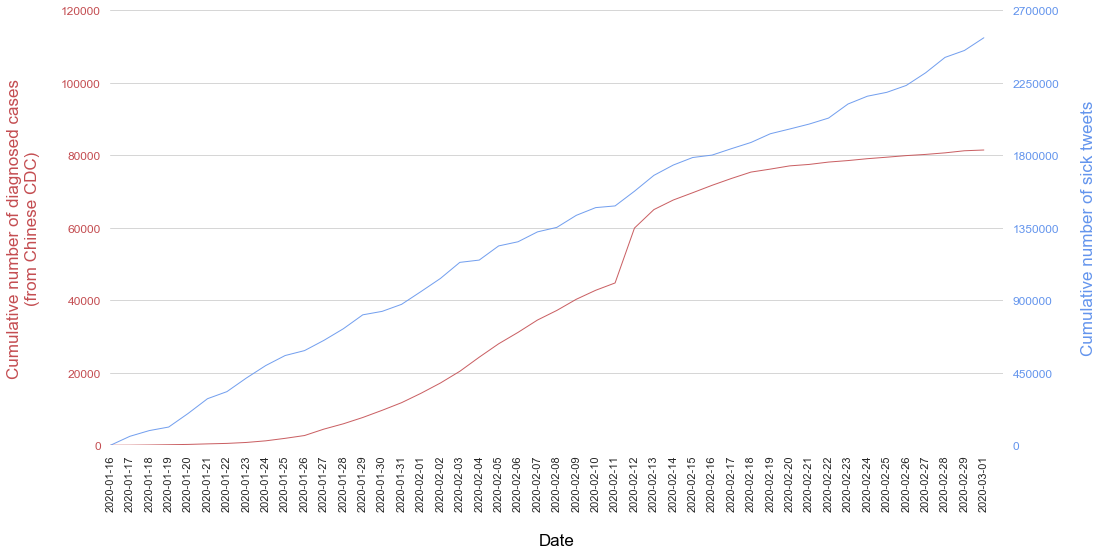

In [16]:
print('\n\n')
sb.set(style='white')
fig = plt.figure(figsize=[16, 8], frameon=False)
ax1 = fig.add_subplot(111)
# share the X axis
ax2 = ax1.twinx()

# set xticks
xticks = [str(d).split()[0] for d in data['Date']]

# line plot 1
sb.lineplot(x=xticks, y=data['diagCu'], linewidth=1, ax=ax1, alpha=0.9, color='r')
ax1.axes.set_ylabel('Cumulative number of diagnosed cases\n(from Chinese CDC)\n', fontsize=17, color='r')
ax1.axes.set_xlabel('\nDate', fontsize=17, color='black', position=(0.5, 0.5))
ax1.tick_params('y', labelcolor='r', labelsize='medium', width=1, color='None')
ax1.grid(axis='y', b=True, linestyle='-', alpha=0.8)
ax1.set_ylim([0, 120000])

ax1.set_xlim((0, len(xticks)))
ax1.set_xticks(range(0, len(xticks), 1))
ax1.set_xticklabels(xticks, rotation=90)
for item in ax1.spines.keys():
#     if item != 'bottom':
    ax1.spines[item].set_visible(False)

# line plot 2
sb.lineplot(x=xticks, y=data['mockCu'], linewidth=1, ax=ax2, alpha=0.9, color='cornflowerblue')
ax2.axes.set_ylabel('\nCumulative number of sick tweets', fontsize=17, rotation=90, color='cornflowerblue')
ax2.tick_params('y', labelcolor='cornflowerblue', labelsize='medium', width=1, color='None')
ax2.set_ylim([0, 2700000])
# ax1's tick interval / ylim = ax2's tick interval / ylim
ax2.set_yticks(np.linspace(0, 2700000, 7))

ax2.set_xlim((0, len(xticks)))
ax2.set_xticks(range(0, len(xticks), 1))
for item in ax2.spines.keys():
#     if item != 'bottom':
    ax2.spines[item].set_visible(False)

In [17]:
fig.savefig('./2.png', transparent=False, facecolor='white', dpi=800, quality=95)
plt.close(fig)